# Business Question 2:
How can we use **historical weather and consumption data** to **predict and optimize energy distribution** year-round? 

# Importing Datasets Needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df1 daily_dataset.csv
energy_daily = pd.read_csv('daily_dataset.csv')

# df2 halfhourly_dataset.csv

# df3 hhblock_dataset

# df7 uk_bank_holidays.csv 
ukbank_hols = pd.read_csv('uk_bank_holidays.csv')

# df8 weather_daily_darksky.csv
weather_daily = pd.read_csv('weather_daily_darksky.csv')

# df9 weather_hourly_darksky.csv 
weather_hourly = pd.read_csv('weather_hourly_darksky.csv')

# df1: Daily Energy Consumption

In [3]:
energy_daily.head(5)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


- block files with the daily information like the number of measures, minimum, maximum, mean, median, sum and std.
- primary key: LCLid

In [4]:
energy_daily['day'] = pd.to_datetime(energy_daily['day'])
energy_daily['day'] = energy_daily['day'].dt.date

In [5]:
energy_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB


In [6]:
energy_daily.isnull().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

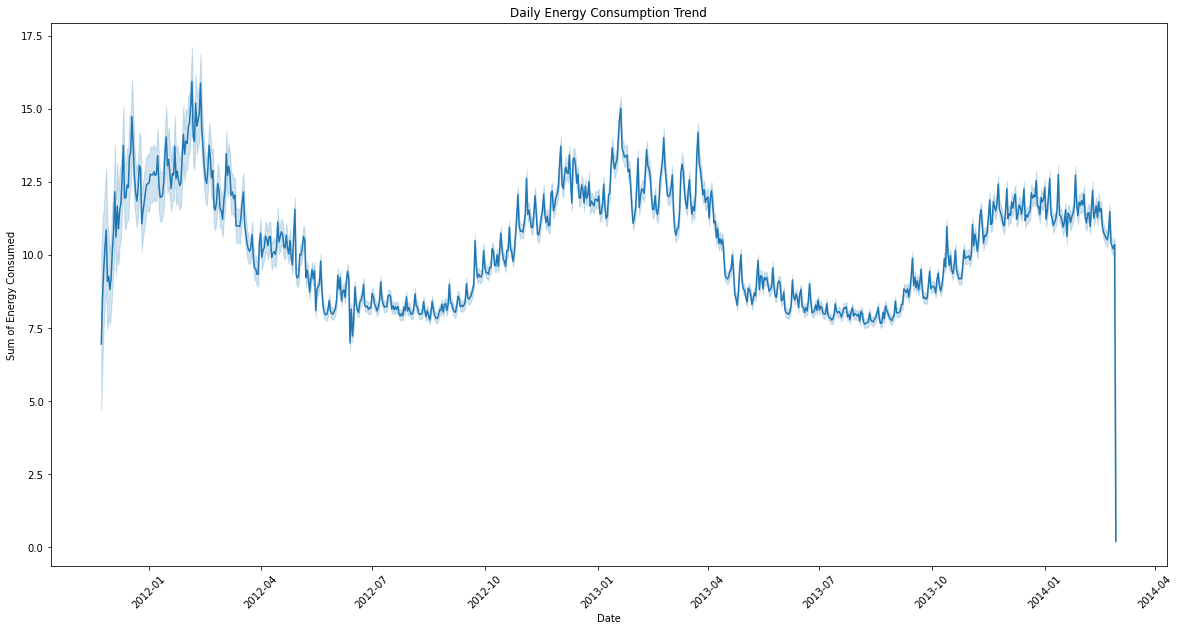

In [7]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='day', y='energy_sum', data=energy_daily)
plt.title('Daily Energy Consumption Trend')
plt.xlabel('Date')
plt.ylabel('Sum of Energy Consumed')
plt.xticks(rotation=45)
plt.show()

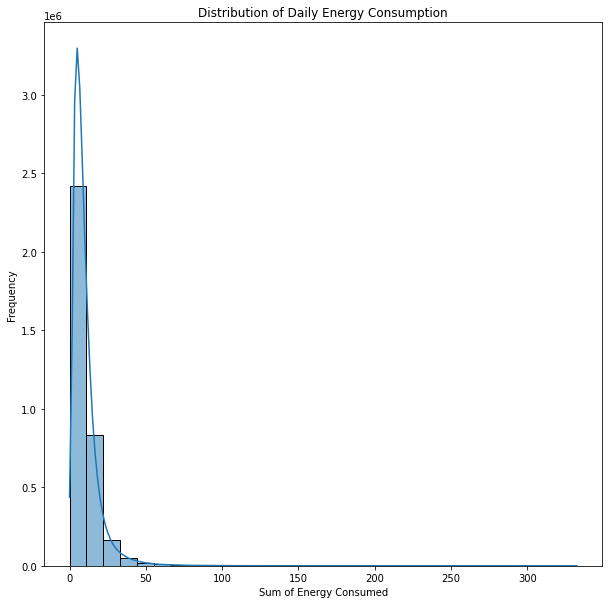

In [8]:
plt.figure(figsize=(10, 10))
sns.histplot(energy_daily['energy_sum'], bins=30, kde=True)
plt.title('Distribution of Daily Energy Consumption')
plt.xlabel('Sum of Energy Consumed')
plt.ylabel('Frequency')
plt.show()

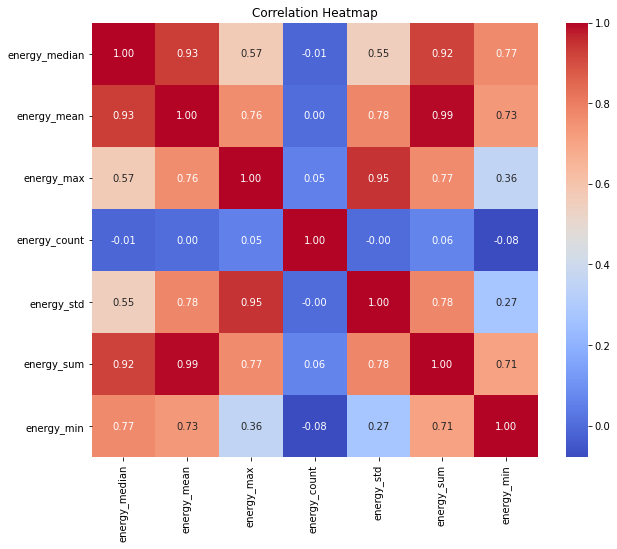

In [9]:
# Select only numeric columns for correlation
numeric_columns = energy_daily.select_dtypes(include=[float, int])

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# df7: Holidays

# df8: Daily Weather

In [10]:
weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11/11/2011 23:00,123,fog,9.40,11/11/2011 7:00,0.79,3.88,1016.08,11/11/2011 7:00,...,10.87,11/11/2011 7:12,11/11/2011 19:00,11/11/2011 11:00,Foggy until afternoon.,11/11/2011 19:00,6.48,11/11/2011 23:00,11/11/2011 19:00,0.52
1,8.59,11/12/2011 14:00,198,partly-cloudy-day,4.49,11/12/2011 1:00,0.56,3.94,1007.71,11/12/2011 2:00,...,8.59,11/12/2011 7:57,11/12/2011 14:00,11/12/2011 12:00,Partly cloudy throughout the day.,12/12/2011 7:00,0.11,11/12/2011 20:00,12/12/2011 8:00,0.53
2,10.33,27/12/2011 2:00,225,partly-cloudy-day,5.47,27/12/2011 23:00,0.85,3.54,1032.76,27/12/2011 22:00,...,10.33,27/12/2011 8:07,27/12/2011 14:00,27/12/2011 0:00,Mostly cloudy throughout the day.,27/12/2011 23:00,5.59,27/12/2011 2:00,28/12/2011 0:00,0.10
3,8.07,02/12/2011 23:00,232,wind,3.69,02/12/2011 7:00,0.32,3.00,1012.12,02/12/2011 7:00,...,7.36,02/12/2011 7:46,02/12/2011 12:00,02/12/2011 10:00,Partly cloudy throughout the day and breezy ov...,02/12/2011 19:00,0.46,02/12/2011 12:00,02/12/2011 19:00,0.25
4,8.22,24/12/2011 23:00,252,partly-cloudy-night,2.79,24/12/2011 7:00,0.37,4.46,1028.17,24/12/2011 7:00,...,7.93,24/12/2011 8:06,24/12/2011 15:00,24/12/2011 13:00,Mostly cloudy throughout the day.,24/12/2011 19:00,-0.51,24/12/2011 23:00,24/12/2011 20:00,0.99


In [11]:
weather_daily.isnull().sum()

temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentTemperatureMaxTime     0
apparentTe

In [12]:
weather_daily.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [13]:
weather_daily['time']

0      11/11/2011 0:00
1      11/12/2011 0:00
2      27/12/2011 0:00
3      02/12/2011 0:00
4      24/12/2011 0:00
            ...       
877    26/01/2014 0:00
878    27/02/2014 0:00
879    09/03/2014 0:00
880    12/02/2014 0:00
881    15/02/2014 0:00
Name: time, Length: 882, dtype: object

In [16]:
# Convert time to datetime
weather_daily['time'] = pd.to_datetime(weather_daily['time'], format="%d/%m/%Y %H:%M")

# Extract only the date
weather_daily['day'] = weather_daily['time'].dt.date
weather_daily

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day,date
0,11.96,11/11/2011 23:00,123,fog,9.40,11/11/2011 7:00,0.79,3.88,1016.08,11/11/2011 7:00,...,11/11/2011 19:00,11/11/2011 11:00,Foggy until afternoon.,11/11/2011 19:00,6.48,11/11/2011 23:00,11/11/2011 19:00,0.52,2011-11-11,2011-11-11
1,8.59,11/12/2011 14:00,198,partly-cloudy-day,4.49,11/12/2011 1:00,0.56,3.94,1007.71,11/12/2011 2:00,...,11/12/2011 14:00,11/12/2011 12:00,Partly cloudy throughout the day.,12/12/2011 7:00,0.11,11/12/2011 20:00,12/12/2011 8:00,0.53,2011-12-11,2011-12-11
2,10.33,27/12/2011 2:00,225,partly-cloudy-day,5.47,27/12/2011 23:00,0.85,3.54,1032.76,27/12/2011 22:00,...,27/12/2011 14:00,27/12/2011 0:00,Mostly cloudy throughout the day.,27/12/2011 23:00,5.59,27/12/2011 2:00,28/12/2011 0:00,0.10,2011-12-27,2011-12-27
3,8.07,02/12/2011 23:00,232,wind,3.69,02/12/2011 7:00,0.32,3.00,1012.12,02/12/2011 7:00,...,02/12/2011 12:00,02/12/2011 10:00,Partly cloudy throughout the day and breezy ov...,02/12/2011 19:00,0.46,02/12/2011 12:00,02/12/2011 19:00,0.25,2011-12-02,2011-12-02
4,8.22,24/12/2011 23:00,252,partly-cloudy-night,2.79,24/12/2011 7:00,0.37,4.46,1028.17,24/12/2011 7:00,...,24/12/2011 15:00,24/12/2011 13:00,Mostly cloudy throughout the day.,24/12/2011 19:00,-0.51,24/12/2011 23:00,24/12/2011 20:00,0.99,2011-12-24,2011-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,26/01/2014 16:00,233,partly-cloudy-day,2.39,26/01/2014 21:00,0.40,4.55,1002.10,26/01/2014 22:00,...,26/01/2014 16:00,26/01/2014 11:00,Mostly cloudy until evening.,27/01/2014 5:00,-1.30,26/01/2014 15:00,27/01/2014 4:00,0.84,2014-01-26,2014-01-26
878,10.31,27/02/2014 14:00,224,partly-cloudy-day,3.08,27/02/2014 23:00,0.32,4.14,1007.02,27/02/2014 22:00,...,27/02/2014 14:00,27/02/2014 12:00,Partly cloudy until evening.,28/02/2014 2:00,1.41,27/02/2014 14:00,28/02/2014 2:00,0.93,2014-02-27,2014-02-27
879,18.97,09/03/2014 14:00,172,partly-cloudy-night,4.30,09/03/2014 7:00,0.04,2.78,1022.44,09/03/2014 7:00,...,09/03/2014 14:00,09/03/2014 12:00,Partly cloudy in the evening.,10/03/2014 5:00,7.08,09/03/2014 14:00,10/03/2014 6:00,0.28,2014-03-09,2014-03-09
880,8.83,12/02/2014 16:00,210,wind,1.94,12/02/2014 1:00,0.59,7.24,994.27,12/02/2014 1:00,...,12/02/2014 16:00,12/02/2014 10:00,Mostly cloudy until evening and breezy through...,13/02/2014 5:00,-1.20,12/02/2014 16:00,13/02/2014 2:00,0.42,2014-02-12,2014-02-12


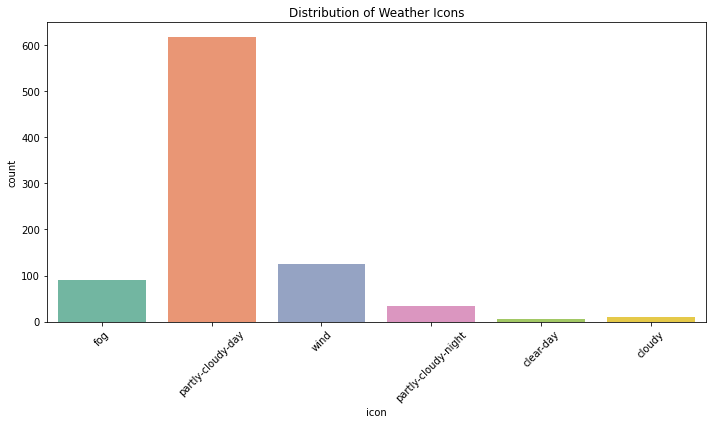

In [17]:
# Plot distribution of the 'icon' column (weather conditions)
plt.figure(figsize=(10, 6))
sns.countplot(x='icon', data=weather_daily, palette='Set2')
plt.title('Distribution of Weather Icons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# df9: Hourly Weather

In [19]:
weather_hourly.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [20]:
# Convert time to datetime
weather_hourly['time'] = pd.to_datetime(weather_hourly['time'])

# Extract only the date
weather_hourly['day'] = weather_hourly['time'].dt.date
weather_hourly

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,date
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy,2011-11-11
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy,2011-11-11
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy,2011-11-11
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy,2011-11-11
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy,2011-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy,2014-02-15
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear,2014-02-15
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear,2014-02-15
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear,2014-02-15


In [21]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   visibility           21165 non-null  float64       
 1   windBearing          21165 non-null  int64         
 2   temperature          21165 non-null  float64       
 3   time                 21165 non-null  datetime64[ns]
 4   dewPoint             21165 non-null  float64       
 5   pressure             21152 non-null  float64       
 6   apparentTemperature  21165 non-null  float64       
 7   windSpeed            21165 non-null  float64       
 8   precipType           21165 non-null  object        
 9   icon                 21165 non-null  object        
 10  humidity             21165 non-null  float64       
 11  summary              21165 non-null  object        
 12  date                 21165 non-null  object        
dtypes: datetime64[ns](1), float64(7

In [22]:
weather_hourly.isnull().sum()

visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
date                    0
dtype: int64

In [23]:
weather_hourly.describe()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,21165.000000,21165.000000,21165.000000,21165,21165.000000,21152.000000,21165.000000,21165.000000,21165.000000
mean,11.166485,195.685897,10.471486,2013-01-14 22:27:36.697377792,6.530501,1014.125153,9.230338,3.905215,0.781829
min,0.180000,0.000000,-5.640000,2011-11-01 00:00:00,-9.980000,975.740000,-8.880000,0.040000,0.230000
25%,10.120000,121.000000,6.470000,2012-06-08 11:00:00,2.820000,1007.430000,3.900000,2.420000,0.700000
50%,12.260000,217.000000,9.930000,2013-01-14 22:00:00,6.570000,1014.780000,9.360000,3.680000,0.810000
75%,13.080000,256.000000,14.310000,2013-08-23 09:00:00,10.330000,1022.050000,14.320000,5.070000,0.890000
max,16.090000,359.000000,32.400000,2014-03-31 22:00:00,19.880000,1043.320000,32.420000,14.800000,1.000000
std,3.099337,90.629453,5.781904,NaN,5.041965,11.388337,6.940919,2.026854,0.140369


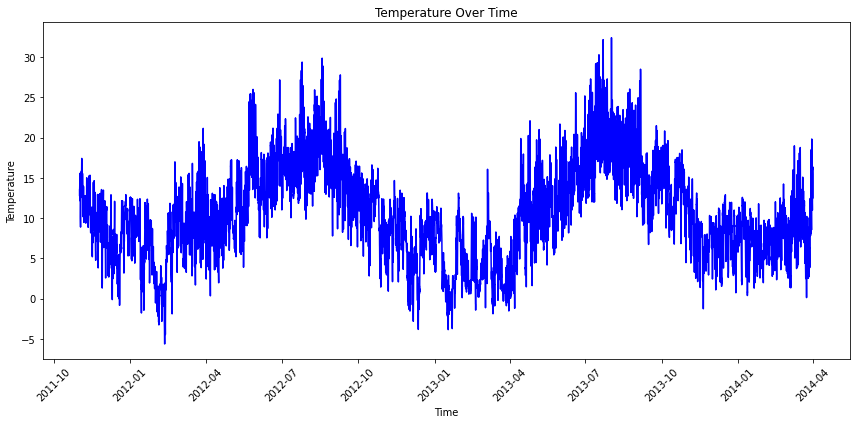

In [24]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='temperature', data=weather_hourly, color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

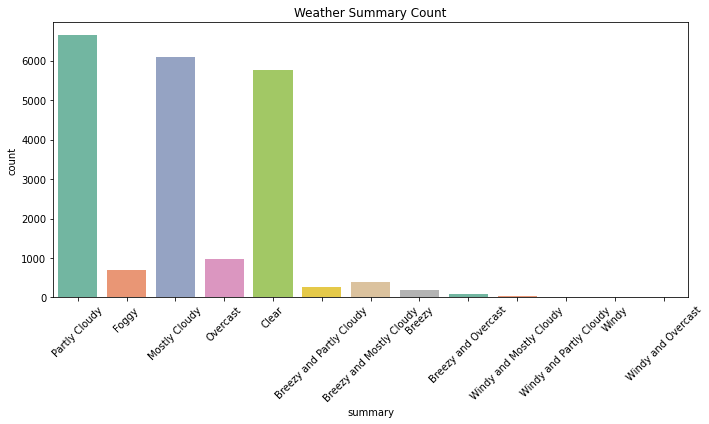

In [25]:
# Weather Summary Count
plt.figure(figsize=(10, 6))
sns.countplot(x='summary', data=weather_hourly, palette='Set2')
plt.title('Weather Summary Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Obtaining a specific household's daily energy consumption with the weather data

Key columns: LCLid, day, energy_sum, temperatureMax, temperatureMin, summary

### MAC005492

In [27]:
MAC005492_energy = energy_daily.loc[energy_daily['LCLid'] == 'MAC005492']
MAC005492_energy

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
2062944,MAC005492,2012-04-17,0.1580,0.153742,0.348,31,0.080700,4.766,0.044
2062945,MAC005492,2012-04-18,0.1145,0.135875,0.368,48,0.084776,6.522,0.045
2062946,MAC005492,2012-04-19,0.1615,0.158667,0.526,48,0.095721,7.616,0.047
2062947,MAC005492,2012-04-20,0.1000,0.136437,0.410,48,0.092637,6.549,0.044
2062948,MAC005492,2012-04-21,0.1130,0.130833,0.316,48,0.070832,6.280,0.046
...,...,...,...,...,...,...,...,...,...
2063493,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079
2063494,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079
2063495,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079
2063496,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079


In [28]:
MAC005492_energy_weather = MAC005492_energy.merge(weather_daily, left_on="day", right_on="day")
MAC005492_energy_weather

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,date
0,MAC005492,2012-04-17,0.1580,0.153742,0.348,31,0.080700,4.766,0.044,10.01,...,18/04/2012 4:58,18/04/2012 13:00,18/04/2012 11:00,Mostly cloudy throughout the day and breezy un...,19/04/2012 6:00,2.76,18/04/2012 13:00,19/04/2012 5:00,0.91,2012-04-17
1,MAC005492,2012-04-18,0.1145,0.135875,0.368,48,0.084776,6.522,0.045,9.93,...,19/04/2012 4:56,19/04/2012 15:00,19/04/2012 12:00,Mostly cloudy throughout the day.,20/04/2012 5:00,3.41,19/04/2012 15:00,20/04/2012 4:00,0.94,2012-04-18
2,MAC005492,2012-04-19,0.1615,0.158667,0.526,48,0.095721,7.616,0.047,12.46,...,20/04/2012 4:54,20/04/2012 11:00,20/04/2012 11:00,Partly cloudy throughout the day.,21/04/2012 5:00,2.92,20/04/2012 11:00,21/04/2012 5:00,0.97,2012-04-19
3,MAC005492,2012-04-20,0.1000,0.136437,0.410,48,0.092637,6.549,0.044,12.45,...,21/04/2012 4:52,21/04/2012 15:00,21/04/2012 11:00,Partly cloudy throughout the day.,22/04/2012 5:00,1.57,21/04/2012 15:00,22/04/2012 5:00,0.01,2012-04-20
4,MAC005492,2012-04-21,0.1130,0.130833,0.316,48,0.070832,6.280,0.046,14.03,...,22/04/2012 4:50,22/04/2012 13:00,22/04/2012 11:00,Partly cloudy throughout the day.,23/04/2012 5:00,2.21,22/04/2012 13:00,23/04/2012 1:00,0.04,2012-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079,14.23,...,24/02/2014 6:58,24/02/2014 13:00,24/02/2014 9:00,Mostly cloudy until evening and breezy overnight.,25/02/2014 3:00,5.52,24/02/2014 13:00,25/02/2014 3:00,0.82,2014-02-24
548,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079,11.43,...,25/02/2014 6:55,25/02/2014 14:00,25/02/2014 9:00,Mostly cloudy throughout the day.,26/02/2014 7:00,3.89,25/02/2014 0:00,26/02/2014 7:00,0.86,2014-02-25
549,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079,11.29,...,26/02/2014 6:53,26/02/2014 13:00,26/02/2014 12:00,Partly cloudy throughout the day.,27/02/2014 0:00,1.67,26/02/2014 13:00,27/02/2014 0:00,0.90,2014-02-26
550,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079,10.31,...,27/02/2014 6:51,27/02/2014 14:00,27/02/2014 12:00,Partly cloudy until evening.,28/02/2014 2:00,1.41,27/02/2014 14:00,28/02/2014 2:00,0.93,2014-02-27


## Creating a for-loop to do the same for all households

In [29]:
unique_hh = energy_daily['LCLid'].unique()
LCLid_array = unique_hh.tolist()

In [ ]:
# Dictionary to store results
energy_weather_dict = {}

for LCLid in LCLid_array:
    filtered_energy = energy_daily.loc[energy_daily['LCLid'] == LCLid]
    merged_data = filtered_energy.merge(weather_daily, left_on="day", right_on="day")
    
    # Store in dictionary
    energy_weather_dict[LCLid] = merged_data

# Now you can access the merged data for each LCLid using energy_weather_dict[LCLid]

In [ ]:
energy_weather_dict['MAC005492']

## Plotting min/max temp. against energy consumption for MAC005492 HH

In [ ]:
# Calculate moving average for variables
MAC005492_energy_weather['temp_min_smooth'] = MAC005492_energy_weather['temperatureMin'].rolling(window=14).mean()
MAC005492_energy_weather['temp_max_smooth'] = MAC005492_energy_weather['temperatureMax'].rolling(window=14).mean()
MAC005492_energy_weather['energy_smooth'] = MAC005492_energy_weather['energy_sum'].rolling(window=14).mean()

# Primary Y-axis (Temperature)
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='b')

# Plot Temperature Min & Max
ax1.plot(MAC005492_energy_weather['day'], MAC005492_energy_weather['temp_min_smooth'], 
         marker='o', linestyle='-', color='g', label='Minimum Temperature (°C)', markersize=3, alpha=0.7)

ax1.plot(MAC005492_energy_weather['day'], MAC005492_energy_weather['temp_max_smooth'], 
         marker='o', linestyle='-', color='b', label='Maximum Temperature (°C)', markersize=3, alpha=0.7)

ax1.tick_params(axis='y', labelcolor='b')  # Match temperature y-axis labels with color
ax1.legend(loc='upper left')

# Secondary Y-axis (Energy Consumption)
ax2 = ax1.twinx()
ax2.set_ylabel('Energy Consumption', color='r')

ax2.plot(MAC005492_energy_weather['day'], MAC005492_energy_weather['energy_smooth'], 
         marker='o', linestyle='--', color='r', label='Energy Consumption', markersize=3, alpha=0.7)

ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Improve Readability
plt.title('Daily Energy and Temperature Trends for MAC005492')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

## Creating a for-loop to plot min. & max. temp. against energy for every household

In [ ]:
for LCLid in LCLid_array:
    energy_weather = energy_weather_dict[LCLid]
    
    # Calculate moving average for variables
    energy_weather['temp_min_smooth'] = energy_weather['temperatureMin'].rolling(window=14).mean()
    energy_weather['temp_max_smooth'] = energy_weather['temperatureMax'].rolling(window=14).mean()
    energy_weather['energy_smooth'] = energy_weather['energy_sum'].rolling(window=14).mean()
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color='b')

    # Plot Temperature Min & Max
    ax1.plot(energy_weather['day'], energy_weather['temp_min_smooth'], 
             marker='o', linestyle='-', color='g', label='Minimum Temperature (°C)', markersize=3, alpha=0.7)

    ax1.plot(energy_weather['day'], energy_weather['temp_max_smooth'], 
             marker='o', linestyle='-', color='b', label='Maximum Temperature (°C)', markersize=3, alpha=0.7)

    ax1.tick_params(axis='y', labelcolor='b')  # Match temperature y-axis labels with color
    ax1.legend(loc='upper left')

    # Secondary Y-axis (Energy Consumption)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Energy Consumption', color='r')

    ax2.plot(energy_weather['day'], energy_weather['energy_smooth'], 
             marker='o', linestyle='--', color='r', label='Energy Consumption', markersize=3, alpha=0.7)

    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='upper right')

    # Improve Readability
    plt.title(f'Daily Energy and Temperature Trends for {LCLid}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()